# Evaluation Exercises

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from pydataset import data

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

Do you work for this exercise in either a jupyter notebook named `evaluate` within your `regression-exercises` repository. By the end of this exercise you will also create a python script named `evaluate`, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name `evaluate` within your `regression-exercises` repo.

## 1.

Load the `tips` dataset from either `pydataset` or `seaborn`.

In [2]:
df = data('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


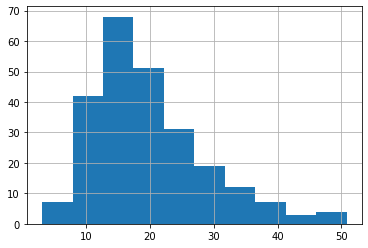

In [4]:
# check to see if variables of interest are normally distributed
df.total_bill.hist();

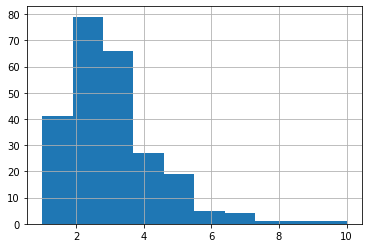

In [5]:
df.tip.hist();

In [6]:
# create baseline (mean of dependent variable (tip))

In [7]:
df['baseline'] = df.tip.mean()

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


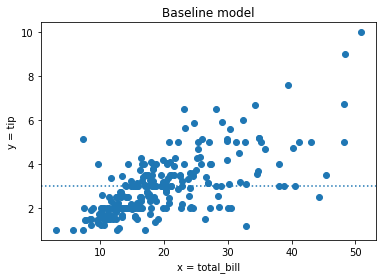

In [9]:
# plot data with baseline:

plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('Baseline model');

In [10]:
# make function
def plot_baseline(x, y):
    plt.scatter(x, y)
    plt.axhline(y.mean(), ls = ':')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Baseline model');

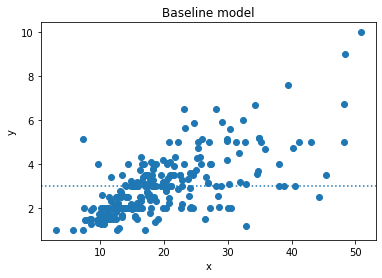

In [11]:
plot_baseline(df.total_bill, df.tip)

## 2.

Fit a linear regression model (ordinary least squares) and compute `yhat`, predictions of `tip` using `total_bill`.

Here is some sample code to get you started:

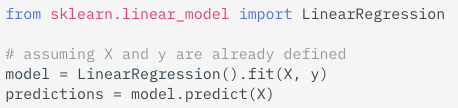

Modify and add to the code above as necessary for it to work with the tips dataset.

In [12]:
# create model
lm = LinearRegression(normalize=True)

In [13]:
# fit the model
lm.fit(df[['total_bill']], df.tip)

LinearRegression(normalize=True)

In [14]:
# make predictions
df['yhat'] = lm.predict(df[['total_bill']])

In [15]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


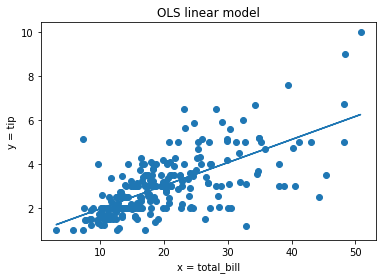

In [16]:
# visualize the line of best fit from OLS linear model
plt.scatter(df.total_bill, df.tip)
plt.plot(df.total_bill, df.yhat)
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('OLS linear model');

In [17]:
# make function
def plot_model(x, y, yhat):
    plt.scatter(x, y)
    plt.plot(x, yhat)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Model');

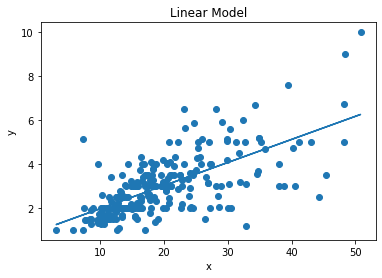

In [18]:
plot_model(df.total_bill, df.tip, df.yhat)

## 3.

Plot the residuals for the linear regression model that you made.

In [19]:
# residual = actual - predicted
df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.baseline
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


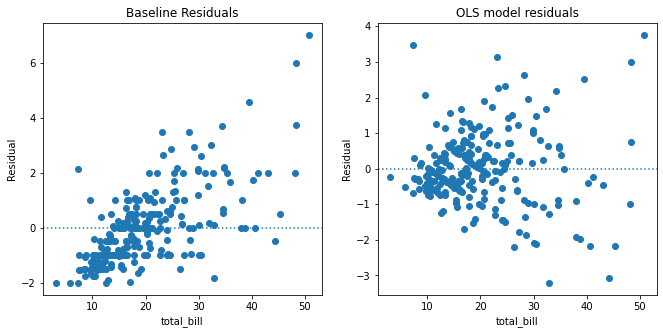

In [20]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.total_bill, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.total_bill, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('OLS model residuals');

**Baseline residuals seem to have some positive correlation to `total_bill`, that is eliminated for model residuals for the most part**

## 4. & 5.

For your model, calculate the:
- [x] sum of squared errors
- [x] mean squared error
- [x] root mean squared error
- [x] total sum of squares
- [x] explained sum of squares

For your baseline model (i.e. a model that always predicts the average tip amount), calculate the:
- [x] sum of squared errors
- [x] mean squared error
- [x] root mean squared error

In [21]:
# first calculate the square of residuals

df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [22]:
# Sum of Squared Errors (SSE)
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print(f'SSE = {SSE:.2f}')
print(f'SSE Baseline = {SSE_baseline:.2f}')

# Mean Squared Error (MSE)
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print(f'MSE = {MSE:.2f}')
print(f'MSE baseline = {MSE_baseline:.2f}')

# Root Mean Squared Error (RMSE)
from math import sqrt

RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)

print(f'RMSE = {RMSE:.2f}')
print(f'RMSE baseline = {RMSE_baseline:.2f}')

# total sum of squares (TSS)
# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline = df['baseline_residual^2'].sum()

print(f'TSS = SSE Baseline = {TSS:.2f}')

# explained sum of squares (ESS)
# Sum of squared error for the regression line (Unexplained error) is calculated above as SSE
# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

print(f'ESS = TSS - SSE = {ESS:.2f}')

SSE = 252.79
SSE Baseline = 465.21
MSE = 1.04
MSE baseline = 1.91
RMSE = 1.02
RMSE baseline = 1.38
TSS = SSE Baseline = 465.21
ESS = TSS - SSE = 212.42


In [23]:
# calculate the easy way using sklearn
MSE2 = mean_squared_error(df.tip, df.yhat)
MSE2_baseline = mean_squared_error(df.tip, df.baseline)

print(f'MSE using sklearn: {MSE2:.2f}')
print(f'MSE of baseline using sklearn: {MSE2_baseline:.2f}')

# calculate SSE the easy way using sklearn
SSE2 = MSE2 * len(df)
SSE2_baseline = MSE2_baseline * len(df)

print(f'SSE using sklearn: {SSE2:.2f}')
print(f'SSE of baseline using sklearn: {SSE2_baseline:.2f}')

# RMSE using sklearn
# calculate RMSE: either take square root of MSE or use sklearn (kwarg 'squared = False')

RMSE2 = mean_squared_error(df.tip, df.yhat, squared = False)
RMSE2_baseline = mean_squared_error(df.tip, df.baseline, squared=False)

print(f'RMSE using sklearn: {RMSE2:.2f}')
print(f'RMSE of baseline using sklearn: {RMSE2_baseline:.2f}')  

MSE using sklearn: 1.04
MSE of baseline using sklearn: 1.91
SSE using sklearn: 252.79
SSE of baseline using sklearn: 465.21
RMSE using sklearn: 1.02
RMSE of baseline using sklearn: 1.38


## 6.

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [24]:
if SSE < SSE_baseline:
    print(f'Model performs better than baseline, {SSE:.2f} < {SSE_baseline:.2f}.')
else:
    print(f'Model does not perform better than baseline, {SSE:.2f} > {SSE_baseline:.2f}.')

Model performs better than baseline, 252.79 < 465.21.


## 7.

What is the amount of variance explained in your model?

In [25]:
# complete the final step and calculate the R^2 value for the model
R2 = ESS/TSS
print(f'R^2 = ESS / TSS = {R2:.2f}')

R^2 = ESS / TSS = 0.46


In [26]:
# validate using sklearn function
from sklearn.metrics import r2_score

r2_score(df.tip, df.yhat)

0.45661658635167657

## 8.

Is your model better than the baseline model?

**Yes, since SSE, MSE, and RMSE are all lower for model than baseline, it is better. Also since R^2 is > 0, we can conclude that it is better.** 

## 9.

Create a file named `evaluate.py` that contains the following functions.

- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

In [27]:
# I think for this one, we would need the independent variable in order to create the residual plot
# I will also add the baseline so that you can see the residual plots side-by-side for comparison
def plot_residuals(x, y, yhat):
    
    plt.figure(figsize = (11,5))

    plt.subplot(121)
    plt.scatter(x, y - y.mean())
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('Baseline Residuals')
    
    plt.subplot(122)
    plt.scatter(x, y - yhat)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('Model residuals');

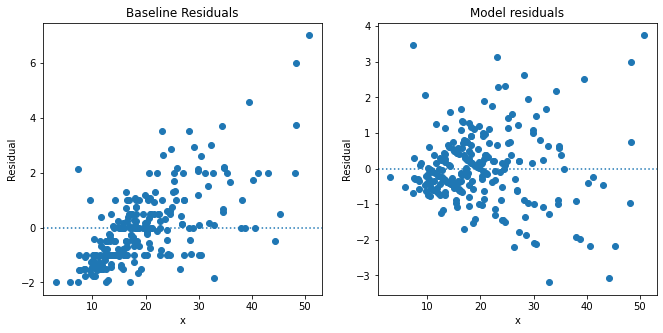

In [28]:
plot_residuals(df.total_bill, df.tip, df.yhat)

- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)

In [29]:
def regression_errors_all(y, yhat):
    SSE = ((y - yhat)**2).sum()
    MSE = SSE / len(y)
    RMSE = MSE ** (1/2)
    ESS = ((yhat - y.mean())**2).sum()
    TSS = SSE + ESS
    R2 = ESS / TSS
    return SSE, MSE, RMSE, ESS, TSS, R2

In [30]:
# more useful version
def regression_errors(y, yhat):
    SSE = ((y - yhat)**2).sum()
    MSE = SSE / len(y)
    RMSE = MSE ** (1/2)
    ESS = ((yhat - y.mean())**2).sum()
    TSS = SSE + ESS
    R2 = ESS / TSS
    return RMSE, R2

In [31]:
SSE, MSE, RMSE, ESS, TSS, R2 = regression_errors_all(df.tip, df.yhat)

print(f'SSE = {SSE:.2f}')
print(f'MSE = {MSE:.2f}')
print(f'RMSE = {RMSE:.2f}')
print(f'TSS = {TSS:.2f}')
print(f'ESS = {ESS:.2f}')
print(f'R^2 = {R2:.2f}')

SSE = 252.79
MSE = 1.04
RMSE = 1.02
TSS = 465.21
ESS = 212.42
R^2 = 0.46


In [32]:
RMSE, R2 = regression_errors(df.tip, df.yhat)

print(f'RMSE = {RMSE:.2f}')
print(f'R^2 = {R2:.2f}')

RMSE = 1.02
R^2 = 0.46


- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model

In [33]:
def baseline_mean_errors(y):
    SSE = ((y - y.mean())**2).sum()
    MSE = SSE / len(y)
    RMSE = MSE ** (1/2)
    return SSE, MSE, RMSE

In [34]:
baseline_mean_errors(df.tip)
print(f'SSE = {SSE:.2f}')
print(f'MSE = {MSE:.2f}')
print(f'RMSE = {RMSE:.2f}')

SSE = 252.79
MSE = 1.04
RMSE = 1.02


- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

In [35]:
def better_than_baseline(y, yhat):
    SSE = ((y - yhat)**2).sum()
    SSE_baseline = ((y - y.mean())**2).sum()
    if SSE < SSE_baseline:
        return True
    else:
        return False

In [36]:
better_than_baseline(df.yhat, df.tip)

False

## 10.

Load the `mpg` dataset and fit a model that predicts `highway mileage` based on `engine displacement`. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your `evaluate.py` to help accomplish this.

In [37]:
df = data('mpg')

In [38]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


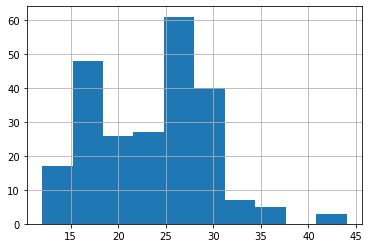

In [39]:
df.hwy.hist();

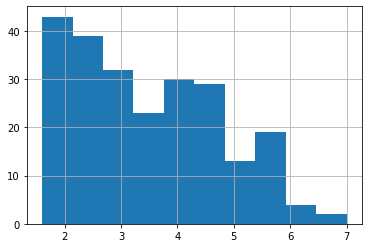

In [40]:
df.displ.hist();

In [41]:
# create the model
lm = LinearRegression(normalize=True)

In [42]:
# fit model
lm.fit(df[['displ']], df.hwy)

LinearRegression(normalize=True)

In [43]:
# make prediction
df['yhat'] = lm.predict(df[['displ']])

In [44]:
# use functions to evaluate model
import evaluate as e

In [45]:
def plot_baseline_and_model(x, y, yhat):
    
    plt.figure(figsize = (11,5))

    plt.subplot(121)
    plt.scatter(x, y)
    plt.axhline(y.mean(), ls = ':', color='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Baseline Model');
    
    plt.subplot(122)
    plt.scatter(x, y)
    plt.plot(x, yhat, color='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Model');

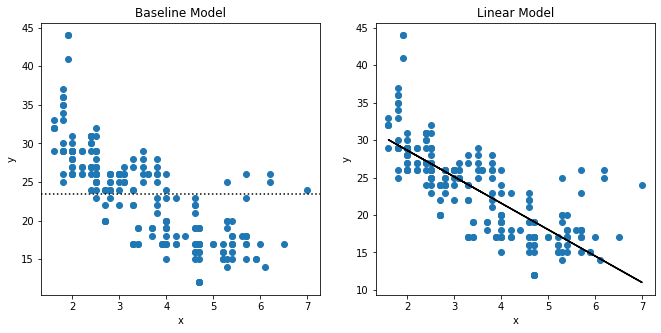

In [46]:
e.plot_baseline_and_model(df.displ, df.hwy, df.yhat)

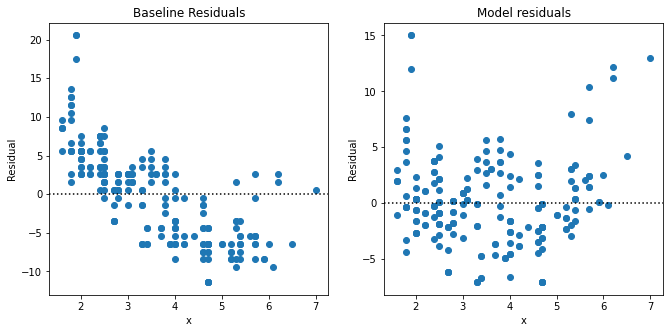

In [47]:
# plot residuals using function
e.plot_residuals(df.displ, df.hwy, df.yhat)

In [48]:
# get important regression errors using function
RMSE, R2 = e.regression_errors(df.hwy, df.yhat)
print(f'RMSE = {RMSE:.2f}')
print(f'R^2 = {R2:.2f}')

RMSE = 3.82
R^2 = 0.59


In [49]:
# get all metrics discussed per instructions
SSE, MSE, RMSE, ESS, TSS, R2 = e.regression_errors_all(df.hwy, df.yhat)
print(f'SSE = {SSE:.2f}')
print(f'MSE = {MSE:.2f}')
print(f'RMSE = {RMSE:.2f}')
print(f'TSS = {TSS:.2f}')
print(f'ESS = {ESS:.2f}')
print(f'R^2 = {R2:.2f}')

SSE = 3413.83
MSE = 14.59
RMSE = 3.82
TSS = 8261.66
ESS = 4847.83
R^2 = 0.59


In [50]:
# bet baseline mean errors
SSE, MSE, RMSE = e.baseline_mean_errors(df.hwy)
print(f'SSE = {SSE:.2f}')
print(f'MSE = {MSE:.2f}')
print(f'RMSE = {RMSE:.2f}')

SSE = 8261.66
MSE = 35.31
RMSE = 5.94


In [51]:
# check if model outperforms baseline using function
if e.better_than_baseline(df.hwy, df.yhat):
    print(f'Model performs better than baseline')
else:
    print(f'Model does not perform better than baseline')


Model performs better than baseline


**Notes:**
- I could go back through and write functions for metrics using sklearn istead of manual calculations, if desired